# PCA

### [ 비지도 학습 ]
- PCA (주성분 분석)
- K-MEANS
- DBSCAN

다중공선성이 존재하지 않는다. but, 원본이 깨졌지때문에 PCA를 한다고 성능이 무조건 좋아지는 것은 아니다.

In [49]:
# !pip install mglearn
# import mglearn

In [50]:
# mglearn.plots.plot_pca_illustration()

In [12]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
 font_name = font_manager.FontProperties(fname=path).get_name()
 rc('font', family=font_name)
elif platform.system()=="Darwin":
 rc('font', family='AppleGothic')
else:
 print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

In [14]:
cancer = load_breast_cancer()

In [15]:
malignant = cancer.data[cancer.target == 1]
benign = cancer.data[cancer.target == 0]

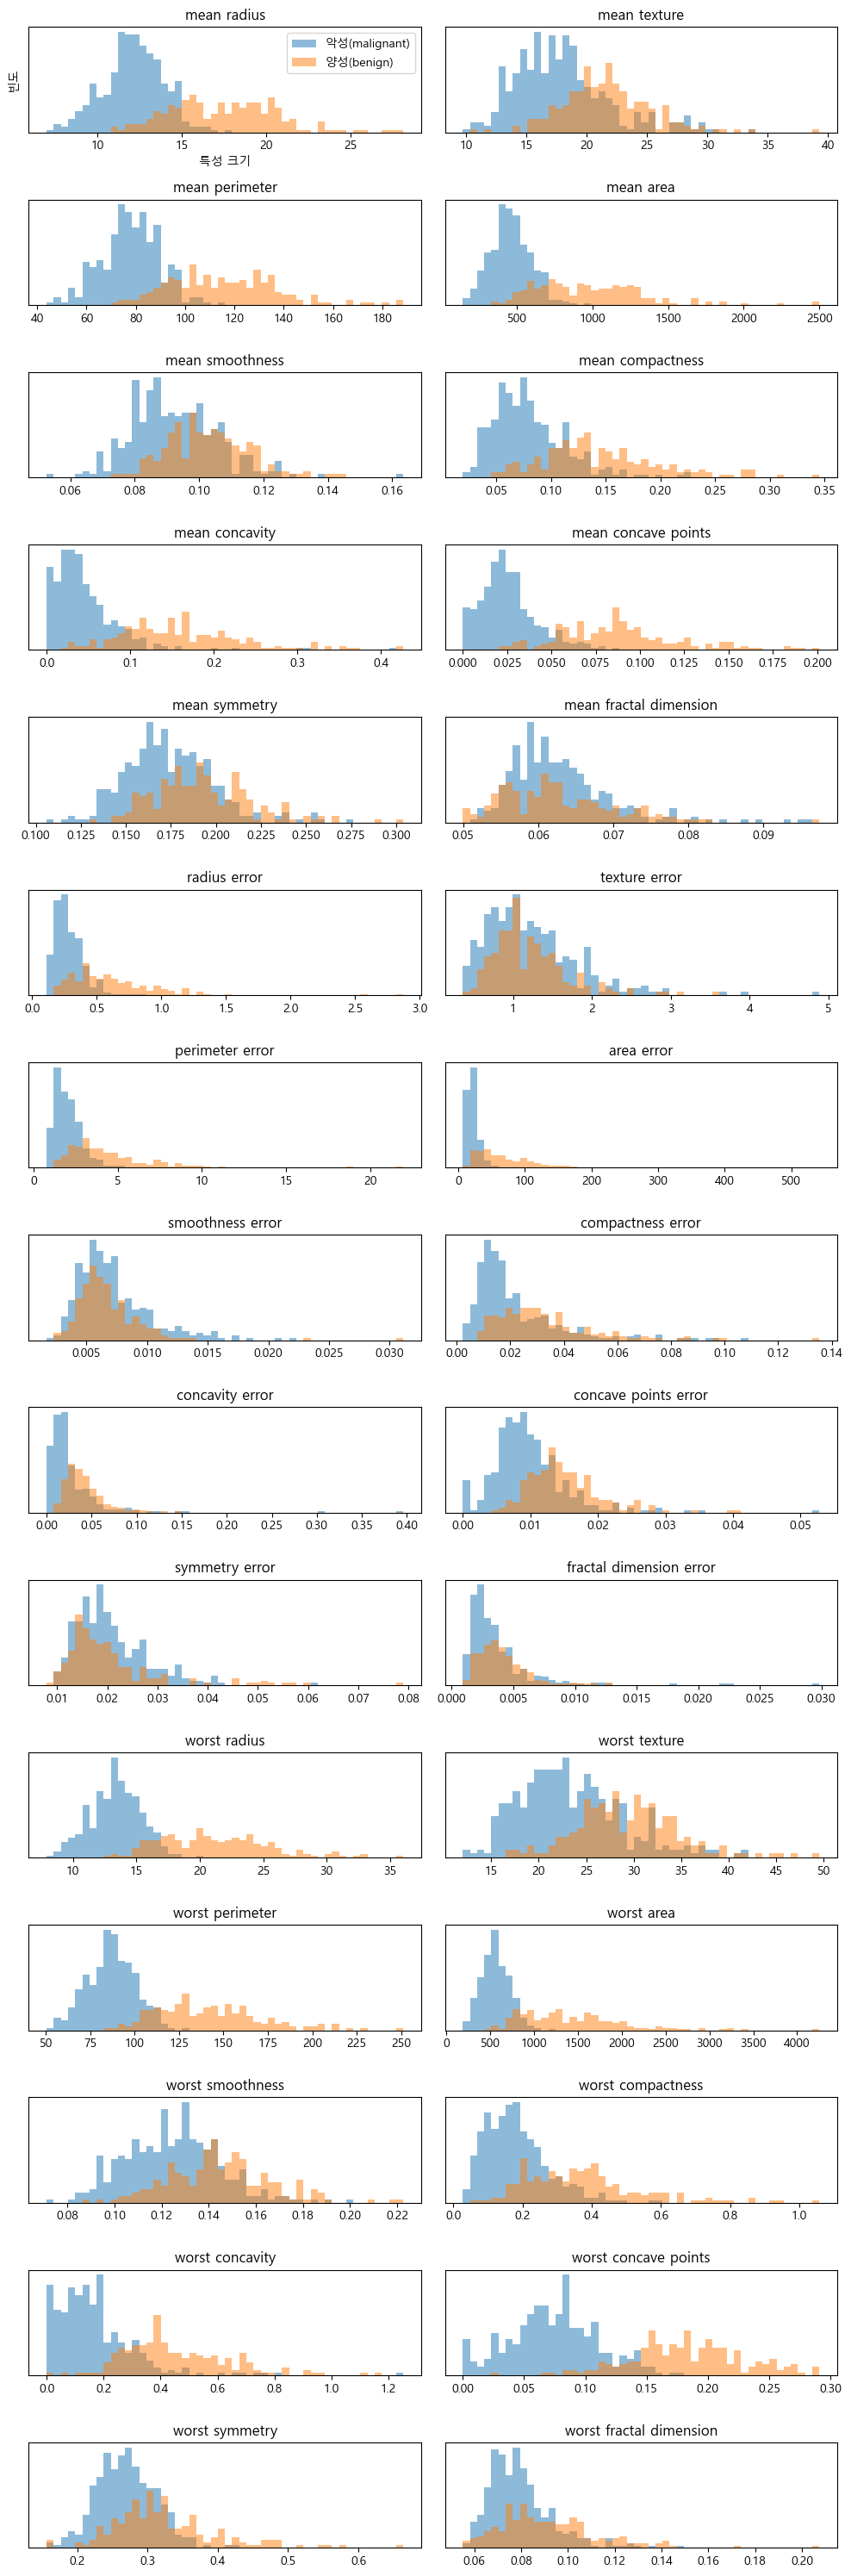

In [17]:
fig, axes = plt.subplots(15, 2, figsize=(10, 30))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성(malignant)", "양성(benign)"], loc="best")
fig.tight_layout()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# data normalization
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [36]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print(f'원본 크기 : {str(X_scaled.shape)}, 변경된 크기 ; {str(X_pca.shape)}')

원본 크기 : (569, 30), 변경된 크기 ; (569, 2)


In [25]:
print('PCA 주성분 형태 ', pca.components_.shape)

PCA 주성분 형태  (2, 30)


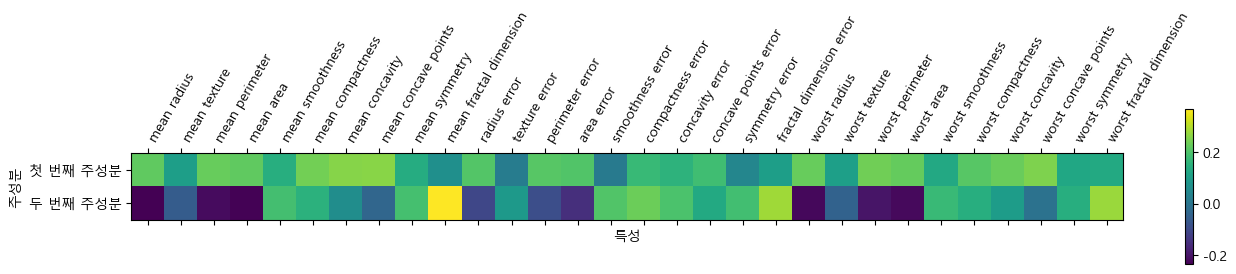

In [40]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")
plt.show()

In [38]:
print('PCA 주성분 형태 ', pca.components_[1])

PCA 주성분 형태  [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


### 5개의 주성분을 만들고 그래프로 표현해보자.

In [44]:
pca = PCA(n_components=5)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print(f'원본 크기 : {str(X_scaled.shape)}, 변경된 크기 ; {str(X_pca.shape)}')

원본 크기 : (569, 30), 변경된 크기 ; (569, 5)


In [45]:
print('PCA 주성분 형태 ', pca.components_.shape)

PCA 주성분 형태  (5, 30)


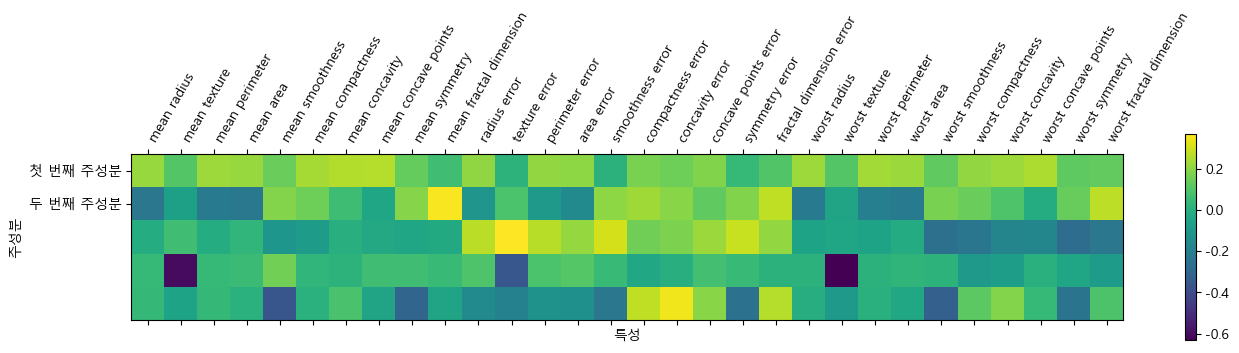

In [46]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")
plt.show()

30개중에 5개$\sim6$개만 봐도 전체 분산의 약 8~90%는 설명할 수 있다. (독립적인 데이터를 뽑다보면 앞에 몇개만 가지고도 기존 데이터를 잘 설명한다. )

### IRIS 데이터 셋을 이용해서 PCA 예제 연습

In [65]:
# !pip install seaborn
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [59]:
iris = sns.load_dataset("iris")

X_iris = iris.drop("species", axis=1)
y_iris = iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [60]:
model = PCA()
X_pca_dat = model.fit(X_iris).transform(X_iris)
print(X_pca_dat.shape, type(X_pca_dat) )

(150, 4) <class 'numpy.ndarray'>


In [70]:
import pandas as pd

df = pd.DataFrame(X_pca_dat[0:,0:])
df

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [ ]:
sns.pairplot(df)

### 주성분 개수 = 2

In [80]:
pca = PCA(n_components=2)

X_pca2 = model.fit(X_iris).transform(X_iris)
print(X_pca2.shape)

(150, 4)


In [ ]:
df = pd.DataFrame()

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")
plt.show()

### Summary
- 대표적인 비지도학습의 종류중 하나이다.
- 주성분을 만들어준다. 기존의 성분을 활용해서 주성분을 만든다.
    - 기존의 피처가 10개가 있으면, 주성분은 10개를 만든다.
    - 주성분 1과 수직을 이루는 성분 중에 가장 큰 분산을 갖는 것을 선택한다. (주성분 2)
    - 주성분 1, 2와 수직을 이루는 성분중에 가장 큰 분산을 갖는 것을 선택 (주성분3)
    - 몇가지 주성분만을 가지고도, 기존의 전체 데이터에 대한 높은 설명력을 갖게 된다.